In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
%matplotlib inline
from IPython import display

In [17]:
img = image.load_img("T-shirt/train/uniform/u(5).jpg")

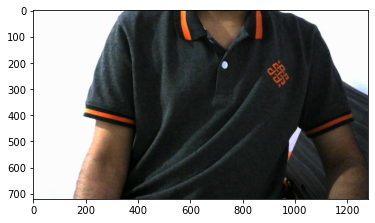

In [18]:
plt.imshow(img)

In [19]:
cv2.imread("T-shirt/train/uniform/u(1).jpg").shape

(720, 1280, 3)

In [20]:
train = ImageDataGenerator(rescale=1/252)
validation = ImageDataGenerator(rescale=1/252)

In [21]:
train_dataset = train.flow_from_directory('T-shirt/train/',target_size=(720,1280),
                                         batch_size=3,
                                         class_mode='binary')

validation_dataset = validation.flow_from_directory('T-shirt/val/',target_size=(720,1280),
                                         batch_size=3,
                                         class_mode='binary')

Found 63 images belonging to 3 classes.
Found 63 images belonging to 2 classes.


In [22]:
train_dataset.class_indices

{'.ipynb_checkpoints': 0, 'civil': 1, 'uniform': 2}

In [9]:
model= tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation= 'relu', input_shape=(720,1280,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(32,(3,3),activation= 'relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  
                                #
                                    tf.keras.layers.Conv2D(64,(3,3),activation= 'relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                   tf.keras.layers.Flatten(),
                                   ##
                                   tf.keras.layers.Dense(512,activation='relu'),
                                   ##
                                   tf.keras.layers.Dense(1,activation='sigmoid')
                                    
                                                            
                                  ])

In [10]:
model.compile(loss = 'binary_crossentropy',
             optimizer = RMSprop(lr=0.001),
             metrics =['accuracy'])

In [11]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [15]:
history = model.fit(train_dataset,
                     epochs=35,steps_per_epoch=3,
                     validation_data= validation_dataset)

ValueError: Failed to find data adapter that can handle input: <class 'NoneType'>, <class 'NoneType'>

In [12]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(0,35)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

NameError: name 'history' is not defined

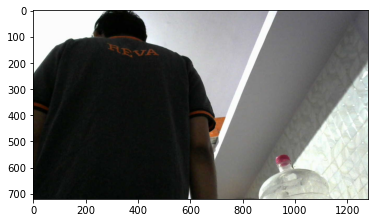

Wearing Uniform
Allowed!


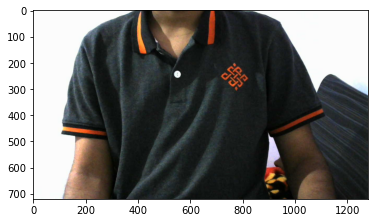

Wearing Uniform
Allowed!


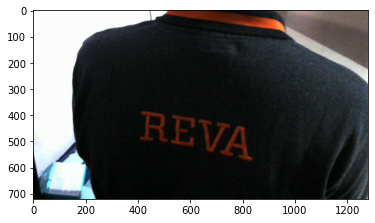

Wearing Uniform
Allowed!


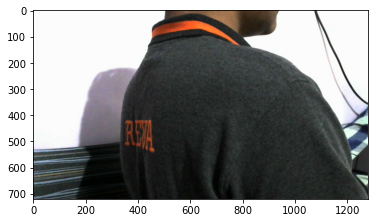

Wearing Uniform
Allowed!


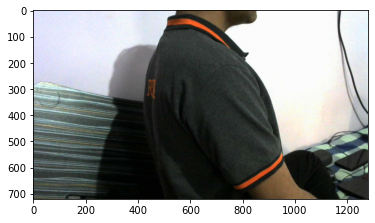

Wearing Uniform
Allowed!


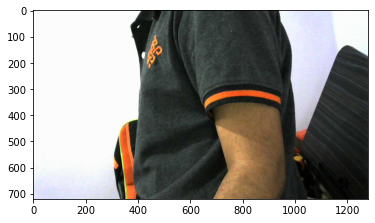

Wearing Uniform
Allowed!


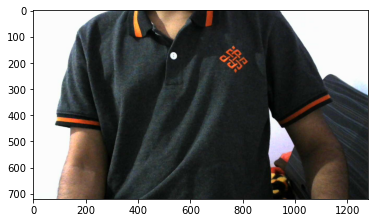

Wearing Uniform
Allowed!


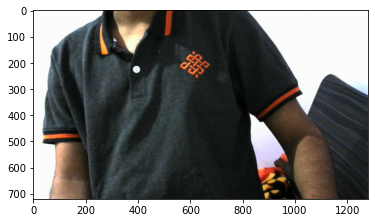

Wearing Uniform
Allowed!


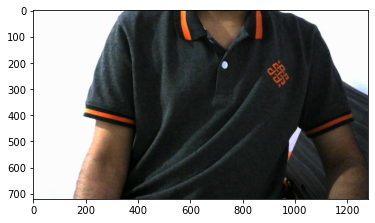

Wearing Uniform
Allowed!


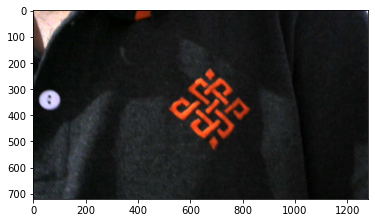

Wearing Uniform
Allowed!


In [13]:
dir_path = 'T-shirt/test/uniform'
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i,target_size=(720,1280,3))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis = 0)
    images = np.vstack([X])
    val = model.predict(images)
    if val<7.7e-6:
        print("No Uniform!!!\nNot Allowed!!!")
    else:
        print("Wearing Uniform\nAllowed!")

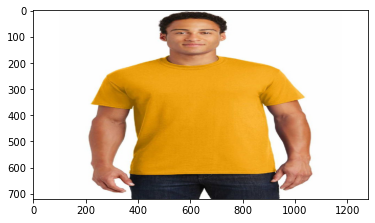

No Uniform!!!
Not Allowed!!!


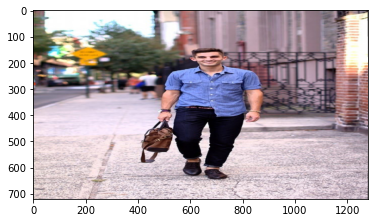

No Uniform!!!
Not Allowed!!!


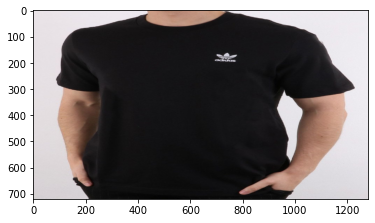

Wearing Uniform
Allowed!


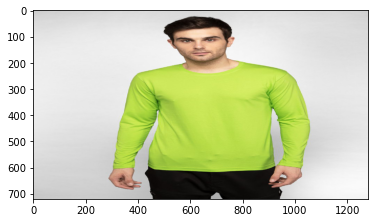

No Uniform!!!
Not Allowed!!!


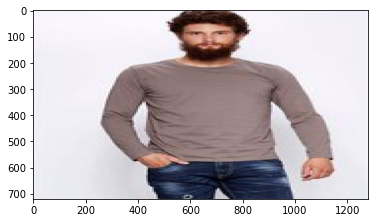

No Uniform!!!
Not Allowed!!!


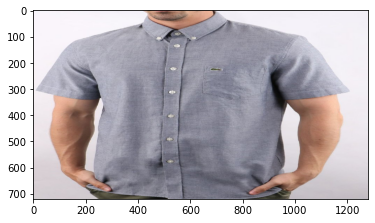

No Uniform!!!
Not Allowed!!!


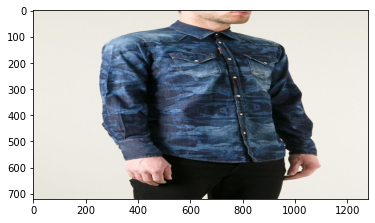

No Uniform!!!
Not Allowed!!!


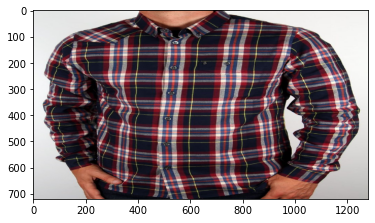

No Uniform!!!
Not Allowed!!!


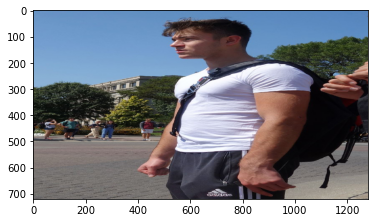

No Uniform!!!
Not Allowed!!!


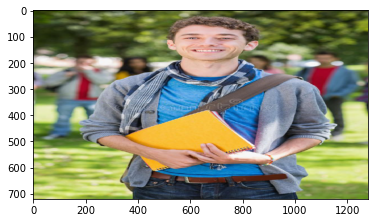

No Uniform!!!
Not Allowed!!!


In [100]:
dir_path = 'T-shirt/test/civil'
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i,target_size=(720,1280,3))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis = 0)
    images = np.vstack([X])
    val = model.predict(images)
    if val<7.7e-6:
        print("No Uniform!!!\nNot Allowed!!!")
    else:
        print("Wearing Uniform\nAllowed!")

In [98]:
model.save('T-shirtModel.h5')